### Assignment 3: Census data income (binary) classification with Random Forest + Boosting
#### Natalie Kim
Take census data and predict whether an individual would have income that exceeds $50k/yr. This is a binary classification problem.

#### 1. Data Processing

##### (a) Import data
Note there is no header, so we will build column names in a later step. Also, remove leading white spaces

In [1]:
import pandas as pd

In [2]:
adult_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None, skipinitialspace=True)

In [3]:
adult_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


##### (b) Build column names
- Use explanation of columns via link provided.
    - Do not include spaces in column names
- Call target variable (last column of ">50k" or "<=50k") "salary"

Build list of column names, and pass those into the .columns() attribute

In [4]:
list_of_columns = ["age", "workclass", "fnlwgt","education","education-num",
                   "marital-status",
                   "occupation","relationship","race","sex","capital-gain",
                   "capital-loss","hours-per-week","native-country","salary"]
adult_df.columns = list_of_columns

In [5]:
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


##### (c) Check dataframe shape to verify # of rows and columns is (32561, 15)

In [6]:
adult_df.shape

(32561, 15)

##### (d) Drop the 3rd column from data ("fnlwgt")

In [14]:
adult_df = adult_df.drop(columns='fnlwgt')
adult_df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


(e) Random values of '?' show up in data and can be left as is. No true NA values, so no need to check

##### (f) Use the .replace() method to make the following changes to "salary" column:
- "<=50k" should become 0
- ">50k" should become 1

Note: this step is essential to calculate ROC_AUC score in model evaluation steps

In [22]:
adult_df['salary'] = adult_df['salary'].replace({'<=50K': 0, '>50K': 1})

##### (g) Create your X dataframe (just your predictors).
It should include every feature except for the target which is "salary". Shape should be (32561, 13)

In [24]:
X = adult_df.drop(columns='salary')

In [26]:
X.shape

(32561, 13)

##### (h) Create y dataframe (target variable)
Shape is (32561, 1). Values should only be 0 and 1

In [27]:
y = adult_df['salary']

In [31]:
y.shape

(32561,)

In [30]:
y.unique()

array([0, 1])

##### (i) Convert columns with factors to separate columns (i.e., one-hot encoding)
Use the Pandas built-in method .get_dummies() to automatically split columns that are categorical

In [32]:
X_encoded = pd.get_dummies(X)

In [33]:
X_encoded.shape

(32561, 107)

##### (j) Split the data into train/test set using 70/30 split. Verify that you have the same number of columns in X_train and X_test

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# split the data 70:30 for train to test ratio
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.3, random_state = 42)

In [37]:
print(X_train.shape, X_test.shape)

(22792, 107) (9769, 107)


#### 2. Random Forest Classifier - Base Model
Start by creating a simple Random Forest only using default parameters - this will let us compare Boosting methods to Random Forest in binary classification problems.

##### (a) Use RandomForestClassifier in sklearn. Fit your model on the training data

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

##### (b) Use the fitted model to predict on test data.
Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes

In [47]:
# predicted probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# predicted classes
y_pred = clf.predict(X_test)

##### (c) Calculate the confusion matrix and classification report
- both are in sklearn.metrics

In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [48]:
# confusion matrix
confusion_matrix(y_test, y_pred)

array([[6839,  616],
       [ 857, 1457]])

In [49]:
# classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      7455
           1       0.70      0.63      0.66      2314

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.84      0.85      0.85      9769



##### (d) Calculate AUC score

In [46]:
from sklearn.metrics import roc_auc_score

In [50]:
# calculate AUC
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC Score:", auc_score)

AUC Score: 0.8887504804105533


##### (e) Identify the top 5 features. Feel free to print a list OR make a plot

In [51]:
# convert feature_importances to pandas series for usability
features = pd.Series(clf.feature_importances_, index=X_train.columns)

# Sort the features based on importance
top_features = features.sort_values(ascending=False)

# Print the top 5 features
print("Top 5 Features:")
print(top_features.head(5))

Top 5 Features:
age                                  0.222586
hours-per-week                       0.113553
capital-gain                         0.101473
education-num                        0.065151
marital-status_Married-civ-spouse    0.063414
dtype: float64


##### (f) Using the model from part B, predict for the train data. Look at the classification report for the train data - is there overfitting for the RandomForest model happening?

In [52]:
# predict on training data
y_pred_train = clf.predict(X_train)

# training classification report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     17265
           1       0.97      0.95      0.96      5527

    accuracy                           0.98     22792
   macro avg       0.98      0.97      0.97     22792
weighted avg       0.98      0.98      0.98     22792



Yes, overfitting is occurring. We can tell based on the difference in the metrics between the training and test data. The training is performing significantly better in the performance metrics such as in the precision, recall, f1-score, and accuracy. For example, test accuracy was only 85%, but the training data has a model accuracy of 98%.

#### 3. AdaBoost Classifier - GridSearch
Start by creating a simple AdaBoostClassifier only using default parameters.

##### (a) Use AdaBoostClassifier along with GridSearchCV tool.
- Run the GridSearchCV using the following. note: feel free to try out more parameters, the above is bare min for this assignment.
    - n_estimators: 100, 200, 300, 400
    - learning_rate: 0.2, 0.4, 0.6, 0.8, 1.0, 1.2
- Use 5 cross-fold and for scoring use 'roc_auc' (this is the score that will be references when identifying the best parameters)

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

In [56]:
# parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.2, 0.4, 0.6, 0.8, 1.0, 1.2]
}

In [57]:
# initialize classifier
ada_classifier = AdaBoostClassifier()

# GridSearchCV
grid_search = GridSearchCV(estimator=ada_classifier, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.2, 0.4, 0.6, 0.8, 1.0, 1.2],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='roc_auc', verbose=1)

##### (b) Use the best estimator from GridSearchCV to predict on test data.
- Use .predict_proba() and .predict() to get predicted probabilities as well as predicted classes

In [58]:
best_model = grid_search.best_estimator_

In [59]:
# predicted probabilities
y_pred_prob2 = best_model.predict_proba(X_test)[:, 1]

# predicted classes
y_pred2 = best_model.predict(X_test)

##### (c) Calculate the confusion matrix and classification report

In [60]:
# confusion matrix
confusion_matrix(y_test, y_pred2)

array([[7008,  447],
       [ 807, 1507]])

In [61]:
# classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7455
           1       0.77      0.65      0.71      2314

    accuracy                           0.87      9769
   macro avg       0.83      0.80      0.81      9769
weighted avg       0.87      0.87      0.87      9769



##### (d) Caluclate AUC score 

In [62]:
# calculate AUC
auc_score = roc_auc_score(y_test, y_pred_prob2)
print("AUC Score:", auc_score)

AUC Score: 0.9244122180504519


##### (e) Identify the top 5 features: list or plot

In [63]:
# convert feature_importances to pandas series for usability
features = pd.Series(best_model.feature_importances_, index=X_train.columns)

# Sort the features based on importance
top_features = features.sort_values(ascending=False)

# Print the top 5 features
print("Top 5 Features:")
print(top_features.head(5))

Top 5 Features:
capital-gain      0.3300
capital-loss      0.2900
age               0.1075
hours-per-week    0.0575
education-num     0.0100
dtype: float64


##### (f) Use model from part (b), predict for train data. Look at classification report for the train data - is there overfitting for the best estimator?

In [64]:
# predict on training data
y_pred_train2 = best_model.predict(X_train)

# training classification report
print(classification_report(y_train, y_pred_train2))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     17265
           1       0.78      0.66      0.71      5527

    accuracy                           0.87     22792
   macro avg       0.84      0.80      0.82     22792
weighted avg       0.87      0.87      0.87     22792



No signs of overfitting as there is no significant discrepancy between the performance metrics of the training dataset versus the test dataset. For example, accuracy and average recall is the same for both training and test sets at 87% and 80% respectively. And training performed only 1% better in average precision at 84% compared to the test set.

#### 4. Gradient Boosting Classifier - GridSearch

##### (a) Use GradientBoostingClassifier along with GridSearchCV
- Run GridSearchCV using the following parameters:
    - n_estimators: 100, 200, 300 & 400
    - learning rate: choose 3 learning rates of your choice
    - max_depth: 1, 2 (you can try deeper, but remember part of the value of boosting stems from minimal complexity of trees)
- Use 5 cross-fold and for scoring use "roc_auc" (this is the score that will be referenced when identifying the best parameters).

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
# parameter grid
param_grid2 = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.2, 0.6, 1.0, 1.2],
    'max_depth': [1,2]
}

In [68]:
# initialize classifier
grdboost_classifier = GradientBoostingClassifier()

# GridSearchCV
grid_search2 = GridSearchCV(estimator=grdboost_classifier, param_grid=param_grid2, cv=5, scoring='roc_auc', verbose=1)

grid_search2.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.2, 0.6, 1.0, 1.2],
                         'max_depth': [1, 2],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='roc_auc', verbose=1)

##### (b) Use the best estimator from GridSearchCV to predict on test data
- Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

In [69]:
best_model2 = grid_search2.best_estimator_

In [70]:
# predicted probabilities
y_pred_prob3 = best_model2.predict_proba(X_test)[:, 1]

# predicted classes
y_pred3 = best_model2.predict(X_test)

##### (c) Calculate the confusion matrix and classification report

In [71]:
# confusion matrix
confusion_matrix(y_test, y_pred3)

array([[7031,  424],
       [ 814, 1500]])

In [72]:
# classification_report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7455
           1       0.78      0.65      0.71      2314

    accuracy                           0.87      9769
   macro avg       0.84      0.80      0.81      9769
weighted avg       0.87      0.87      0.87      9769



##### (d) Calculate the AUC score

In [73]:
# calculate AUC
auc_score = roc_auc_score(y_test, y_pred_prob3)
print("AUC Score:", auc_score)

AUC Score: 0.925995935277467


##### (e) Identify the top 5 features. Feel free to print a list OR to make a plot

In [74]:
# convert feature_importances to pandas series for usability
features = pd.Series(best_model2.feature_importances_, index=X_train.columns)

# Sort the features based on importance
top_features = features.sort_values(ascending=False)

# Print the top 5 features
print("Top 5 Features:")
print(top_features.head(5))

Top 5 Features:
marital-status_Married-civ-spouse    0.360032
capital-gain                         0.219108
education-num                        0.173296
capital-loss                         0.066789
age                                  0.062394
dtype: float64


##### (f) Use model from part (b), predict for train data. Look at classification report for the train data - is there overfitting for the best estimator?

In [99]:
# predict on training data
y_pred_train3 = best_model2.predict(X_train)

# training classification report
print(classification_report(y_train, y_pred_train3))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92     17265
           1       0.81      0.67      0.73      5527

    accuracy                           0.88     22792
   macro avg       0.85      0.81      0.83     22792
weighted avg       0.88      0.88      0.88     22792



No overfitting for this model as well. The training accuracy was only 88% compared to the test of 87%. All of the other performance metrics are also within a 1 to 3% range of each other. This is not significant to be suspicious of overfitting

#### 5. XGBoost - RandomizedSearchCV

##### (a) Use xgboost along with RandomizedSearchCV
- Run RandomizedSearchCV using the following parameters. Note: For parameters with increments please don't feel the need to type each value by hand.
    - n_estimators: 100-1000 in increments of 50  (i.e. 100,150,200,.....1000)
    - learning rate: 0.1 - 1.6 in increments of 0.1
    - max_depth: 1, 2
    - gamma: 0 - 5 in increments of 0.25
- For RandomizedSearchCV make sure to still use cv = 5 and for scoring use "roc_auc".
- Note that you will have to install xgboost using "pip install xgboost". This can be done in your jupyter notebook with the following command: 

In [86]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

In [88]:
# parameter grid
param_grid2 = {
    'n_estimators': np.arange(100,1001,50),
    'learning_rate': np.arange(0.1, 1.7, 0.1),
    'max_depth': [1,2],
    'gamma': np.arange(0, 5.25, 0.25)
}

In [91]:
bst = XGBClassifier()
# RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=bst, param_distributions=param_grid2, cv=5, scoring='roc_auc', verbose=1)

rand_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'gamma': array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
       2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
                                        'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6]),
                                        'max_depth': [1, 2],
                                        'n_estimators': array([ 100,  150,  200,  250,  300,  350,  400,  450,  500,  550,  600,
        650,  700,  750,  800,  850,  900,  950, 1000])},
                   scoring='roc_auc', verbose=1)

##### (b) Use the best estimator from RandomizedSearchCV to predict on test data
- Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

In [92]:
best_model3 = rand_search.best_estimator_

In [93]:
# predicted probabilities
y_pred_prob4 = best_model3.predict_proba(X_test)[:, 1]

# predicted classes
y_pred4 = best_model3.predict(X_test)

##### (c) Calculate the confusion matrix and classification report

In [94]:
# confusion matrix
confusion_matrix(y_test, y_pred4)

array([[7020,  435],
       [ 786, 1528]])

In [95]:
# classification_report
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7455
           1       0.78      0.66      0.71      2314

    accuracy                           0.88      9769
   macro avg       0.84      0.80      0.82      9769
weighted avg       0.87      0.88      0.87      9769



##### (d) Calculate the AUC score

In [96]:
# calculate AUC
auc_score = roc_auc_score(y_test, y_pred_prob4)
print("AUC Score:", auc_score)

AUC Score: 0.9269584374585166


##### (e) Identify the top 5 features. Feel free to print a list OR to make a plot

In [97]:
# convert feature_importances to pandas series for usability
features = pd.Series(best_model3.feature_importances_, index=X_train.columns)

# Sort the features based on importance
top_features = features.sort_values(ascending=False)

# Print the top 5 features
print("Top 5 Features:")
print(top_features.head(5))

Top 5 Features:
marital-status_Married-civ-spouse    0.471952
education-num                        0.080609
occupation_Exec-managerial           0.040402
relationship_Own-child               0.030036
occupation_Other-service             0.029815
dtype: float32


##### (f) Use model from part (b), predict for train data. Look at classification report for the train data - is there overfitting for the best estimator?

In [98]:
# predict on training data
y_pred_train4 = best_model3.predict(X_train)

# training classification report
print(classification_report(y_train, y_pred_train4))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92     17265
           1       0.81      0.68      0.74      5527

    accuracy                           0.88     22792
   macro avg       0.85      0.81      0.83     22792
weighted avg       0.88      0.88      0.88     22792



No occurrence of overfitting for this model as well. The accuracy between training and test data are the same of 88%. And the other performance metrics are within 1% differnece of each other between the training and test data sets.

#### 6. Conceptual Problems

##### (a) The lecture notes describe the Gini Index which is the default criterion used for splitting in sklearn's version of RandomForestClassifier. How does the Gini Index work? (i.e. How is it used to build a top-performing model?). 
A Random Forest model's objective will to reduce the Gini Index at every cut, or split, so that the it is low at the nodes. A small Gini Index indicates low variation - as in that the data points are a true fit to that node.

##### (b) Describe how Random Forest is different from bagging & why this difference can yield improved results.
Bagging, builds regression trees using boostrapped training samples whereas Random Forest decorrelates the trees by using a random subset of features to split for each tree. This decorrelation can yield improved results as it introduces noise, or a diversity in opinion. The more noise we introduce, the more we prevent the model from memorizing the patterns in the training data subsets, thus allowing us to have a lower generalization error and reducing the chances of ovefitting.

##### (c) Describe the importance of the max_depth parameter in Random Forest. Do not just provide a definition, rather think through how bias-variance tradeoff might be impacted by the max_depth parameter.
Tuning the max_depth parameter impacts whether the model could potentially overfit or underfit. If there is no limit to the max_depth parameter, the model will produce a deeper and more complex tree with more nodes. However, if there are too many nodes, then the model could be potentially too specific to the data, thereby suffering from high variance and overfitting. If the max_depth is too constricted, then we run the risk of high bias and underfitting as they may not capture all of the patterns in the data.

##### (d) What does the alpha parameter represent in AdaBoost? Please refer to chapter 7 of the Hands-On ML book if you are struggling.
Alpha is the calculated weight of the predictor. It indicates the accuracy of the predictor using the weighted error rate of the jth predictor and the learn‐ ing rate hyperparameter. The more accurate the predictor, the higher alpha's value will be.

##### (e) In AdaBoost explain how the final predicted class is determined. Be sure to reference the alpha term in your explanation.
In order to determine the predicted class, we must first compute the predictions of all the predictors, and then weigh each of them them using their respective classifier weights, alpha. The results is a class voting and the final predicted class is the one that receives the highest sum of weighted votes across all classifiers.

##### (f) In Gradient Boosting, what is the role of the max_depth parameter? Why is it important to tune on this parameter?
max_depth specifies the depth of the trees. Similar to as discussed earlier, the parameter is important to tune to mitigate overfitting and underfitting, and subsequently the variance and bias tradeoff as well.

##### (g) In Part (e) of Steps 2-5 you determined the top 5 predictors across each model. Do any predictors show up in the top 5 predictors for all three models? If so, comment on if this predictor makes sense given what you are attempting to predict. (Note: If you don't have any predictors showing up across all 3 predictors, explain one that shows up in 2 of them).
No, none of the predictors appeared in the top five predictors for all three of my models. However one of the features that did appear twice include is capital-gain. Given we are trying to predict whether an individual would have income that exceeds $50k/year, an individual's capital gain - that is their profit from selling assets - could certainly add to an individual's yealy income.

##### (h) From the models run in steps 2-5, which performs the best based on the Classification Report? Support your reasoning with evidence from your test data and be sure to share the optimal hyperparameters found from your grid search.
The XGBoost model performed the best based on the Classification Report. It had a greater accuracy of 88% compared to the 87% that both Adaboost and Gradient Boost held. The other metrics - recall, precision, and F1-score - were all either same across the models, or also 1% higher in favor of the XGBoost model. 

##### (i) For your best performing model, plot out a ROC curve using your test data. Feel free to use sklearn, matplotlib or any other method in python. Describe what the x-axis & y-axis of the ROC curve tell us about a classifier.

In [102]:
from sklearn.metrics import RocCurveDisplay

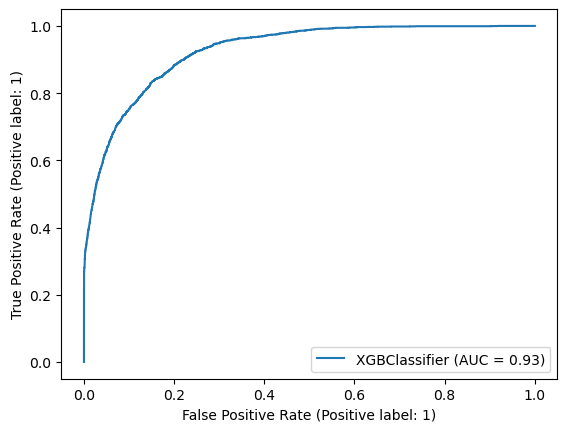

In [103]:
svc_disp = RocCurveDisplay.from_estimator(best_model3, X_test, y_test)
plt.show()

The y-axis reflects the True Positive Rate. This is also the Sensitivity or Recall. It tells us how well the model can identify the positive instances. The x-axis is the false positive rate. This is the sum of false positives and true negatives, and it measures how many incorrect positive predictions are made out of all negative samples available during the test.